# CodSoft Task 2
# MOVIE RATING PREDICTION

# Step 1: Domain problem

### The domain problem for movie rating prediction involves predicting the numerical rating that a movie is likely to receive based on various features associated with the movie. This problem falls under the broader domain of machine learning and predictive analytics. Specifically, it can be categorized as a regression problem, as the goal is to predict a continuous numerical value (the movie rating).

##### 

# Step 2: Collecting data

# import the libraries needed to work
#### Pandas: for reading csv file & visualizing data, such as creating line plots, bar charts, and histograms.
#### NumPy: provides a wide range of mathematical operations as linear algebra operations.
#### Matplotlib: for data visualization.
#### Seaborn: for statistical data visualization.
#### %matplotlib inline: #To ensure that the visualized will appear on the same notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## reading csv file and show dataset

In [2]:
# Read the CSV file into a DataFrame with 'latin-1' encoding
df = pd.read_csv("IMDbMoviesIndia.csv", encoding='latin-1')

# Display the DataFrame
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


#### Name: The name of the movie.
#### Year: The year of the movie's release.
#### Duration: The duration or runtime of the movie.
#### Genre: The genre(s) of the movie.
#### Rating: The rating given to the movie.
#### Votes: The number of votes or ratings received by the movie.
#### Director: The director of the movie.
#### Actor 1, Actor 2, Actor 3: The primary actors in the movie.
#### 

In [3]:
# shape of dataset
df.shape

(15509, 10)

In [4]:
# Check for missing values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
# Get basic statistics for numerical columns
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


#### Count: There are 7919 entries in the "Rating" column, meaning you have ratings for 7919 movies.
#### Mean: The average rating is approximately 5.84. This gives you an overall idea of the central tendency of the ratings in your dataset.
#### Standard Deviation (std): The standard deviation is about 1.38. This indicates the amount of variability or dispersion in the ratings. A higher standard deviation suggests more variability.
#### Min: The minimum rating in your dataset is 1.1, indicating that there are movies with relatively low ratings.
#### 25% (Q1): The first quartile (25th percentile) is 4.9. This means that 25% of the ratings fall below 4.9.
#### 50% (Median): The median (50th percentile or Q2) is 6.0. This is the middle value of the ratings when they are sorted in ascending order.
#### 75% (Q3): The third quartile (75th percentile) is 6.8. This means that 75% of the ratings fall below 6.8.
#### Max: The maximum rating in your dataset is 10.0, indicating that there are movies with the highest possible rating.
#### 

# Step 3: data cleaning

In [6]:
# Convert the 'Votes' column to numeric, coercing errors to NaN for non-numeric values
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Filling missing values in 'Rating' column with the mean
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Filling missing values in 'Votes' column with the mean
df['Votes'].fillna(df['Votes'].mean(), inplace=True)

In [7]:
# removing missing data in Actor 1 , Actor 2 , Actor 3 by replacing any null value with "UnKnown"
def groupActors(Actor):
    
    if(pd.notnull(Actor)):
        
        return Actor
    
    else:
        
        return "Unknown" # for Unknown 

df['Actor 1'] = df['Actor 1'].apply(groupActors)
df['Actor 2'] = df['Actor 2'].apply(groupActors)
df['Actor 3'] = df['Actor 3'].apply(groupActors)

In [8]:
# Check for missing values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [9]:
# Handle missing values (remove rows with missing values)
df = df.dropna()

In [10]:
# Check for missing values
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
# shape of dataset
df.shape

(6919, 10)

In [12]:
# Clean and standardize data (remove non-numeric characters from "Year" column)
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\1121961528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].str.extract('(\d+)').astype(int)


In [13]:
# Convert the 'Votes' column to string, remove commas, and convert to floats
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(float)

C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\1576962498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(float)


In [14]:
# Convert the 'Duration' column to string, remove "min", and convert to integers
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\3535448445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)


In [15]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [16]:
# Get basic statistics for numerical columns
df.describe()

,Year,Duration,Rating,Votes
count,6919.000000,6919.000000,6919.000000,6919.000000
mean,1997.616274,128.261743,5.915260,147.450456
std,20.142095,28.870175,1.276729,178.101363
min,1931.000000,2.000000,1.100000,5.000000
25%,1985.000000,110.000000,5.300000,37.000000
50%,2004.000000,131.000000,5.841621,120.839493
75%,2015.000000,147.000000,6.800000,120.839493
max,2022.000000,321.000000,10.000000,999.000000


#### Year:
#### The movies in your dataset range from 1931 to 2022.
#### The average (mean) year of release is approximately 1997.
#### The majority of movies fall within the years 1985 to 2015.

#### Duration:
#### The duration of movies in your dataset ranges from 2 minutes to 321 minutes.
#### The average duration is approximately 128 minutes.
#### The majority of movies have a duration between 110 and 147 minutes.

#### Rating:
#### Movie ratings range from 1.1 to 10.
#### The average rating is approximately 5.92.
#### Ratings are spread across a relatively narrow range, with the majority falling between 5.3 and 6.8.

#### Votes:
#### The number of votes (or ratings) per movie ranges from 5 to 999.
#### The average number of votes is approximately 147.
#### The distribution of votes is right-skewed, with a higher concentration of movies having a lower number of votes.
#### 

# Step 4: Data visualizaton

In [17]:
# 1- What is the most frequent rate
df['Rating'].value_counts()

Rating
5.841621     1100
6.800000      206
6.500000      197
6.200000      193
7.100000      168
             ... 
1.600000        2
1.400000        1
9.700000        1
10.000000       1
1.100000        1
Name: count, Length: 84, dtype: int64

In [18]:
# 2- What is the most frequent rate
df['Votes'].value_counts()

Votes
120.839493    2469
7.000000        98
10.000000       92
9.000000        91
13.000000       80
              ... 
298.000000       1
237.000000       1
487.000000       1
937.000000       1
408.000000       1
Name: count, Length: 752, dtype: int64

Name                 Average Rating  Movie Count
Ashok Vatika         9.3             1              1
Baikunth             9.3             1              1
Gho Gho Rani         9.4             1              1
God of gods          9.3             1              1
Half Songs           9.7             1              1
June                 9.4             1              1
Love Qubool Hai      10.0            1              1
Love Sorries         9.3             1              1
Refl3ct              9.3             1              1
The Reluctant Crime  9.4             1              1
Name: count, dtype: int64


C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\209750631.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='Average Rating', data=top_10_names, ci=None)  # ci=None removes error bars


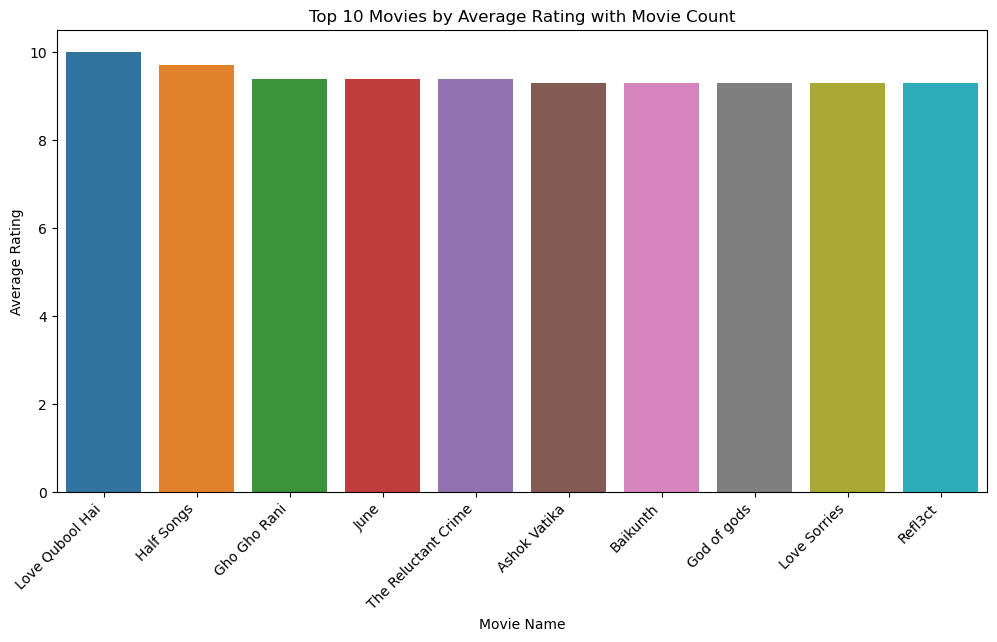

In [19]:
# 3- How many rating value for top 10 movies ?

# Calculate average rating and count for each movie name
name_stats = df.groupby('Name').agg({'Rating': 'mean', 'Genre': 'count'}).reset_index()
name_stats.columns = ['Name', 'Average Rating', 'Movie Count']

# Select the top 10 movie names based on average rating
top_10_names = name_stats.nlargest(10, 'Average Rating')
# Sort the top 10 movies by rating
top_10_names = top_10_names.sort_values(by='Average Rating', ascending=False)
count=top_10_names.value_counts()
print(count)

# Create a bar plot for the top 10 movie names with count
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Average Rating', data=top_10_names, ci=None)  # ci=None removes error bars
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Top 10 Movies by Average Rating with Movie Count')
plt.xlabel('Movie Name')
plt.ylabel('Average Rating')
plt.show()

Genre                            Rating
Animation, Comedy, Family        8.30      1
Biography, Family                8.30      1
Documentary, Biography, Family   8.25      1
Documentary, Biography, Musical  8.05      1
Documentary, Biography, Sport    8.20      1
Documentary, Family, History     9.30      1
Documentary, Sport               8.60      1
Documentary, Thriller            8.70      1
Drama, Musical, Sport            8.10      1
History, Romance                 9.40      1
Name: count, dtype: int64


C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\2561420278.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Genre', y='Rating', data=top_10_genres, ci=None)  # ci=None removes error bars


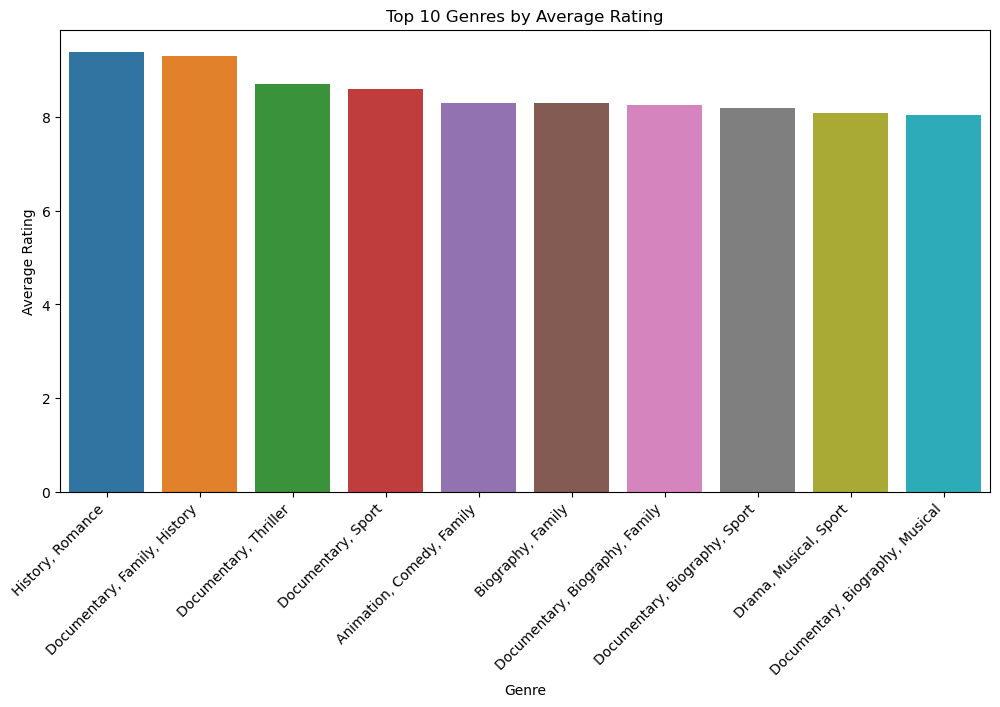

In [20]:
# 4- How many rating value for top 10 genre ?

# Calculate average rating for each genre
genre_avg_rating = df.groupby('Genre')['Rating'].mean().reset_index()

# Select the top 10 genres based on average rating
top_10_genres = genre_avg_rating.nlargest(10, 'Rating')

# Sort the top 10 movies by rating
top_10_genres = top_10_genres.sort_values(by='Rating', ascending=False)
count=top_10_genres.value_counts()
print(count)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Rating', data=top_10_genres, ci=None)  # ci=None removes error bars
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

In [21]:
# Concatenate 'Actor 1', 'Actor 2', and 'Actor 3' into a new column 'All Actors'
df['All Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\3473505445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['All Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)


C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\2206743300.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='All Actors', y='Rating', data=top_10_actors, ci=None, order=top_10_actors['All Actors'])


All Actors                                         Rating
Ahaan Jha, Mahesh Narayan, Rajasree Rajakumari     10.0      1
Dharmendra Ahir, Awanish Kotnal, Rakhi Mansha      9.4       1
Kunj Anand, Sanjay Bishnoi, Paras Zutshi           9.3       1
Leila Advani, Laj Badlani, Chaho Bhara             9.3       1
Manoj Bajpayee, R.S. Bhist, K.N. Dixit             9.3       1
Nishi Neha Mishra, Pankaj Kamal, Akash Kumar       9.4       1
Prashant Chaubey, Puneet Chouksey, Amitabh Gupta   9.3       1
Raj Banerjee, Emon Chatterjee, Purshottam Mulani   9.7       1
Tejaswini Manogna, Triyug Mantri, Raj Singh Verma  9.3       1
Vaibhav Khisti, Nilesh Divekar, Jitendra Joshi     9.4       1
Name: count, dtype: int64


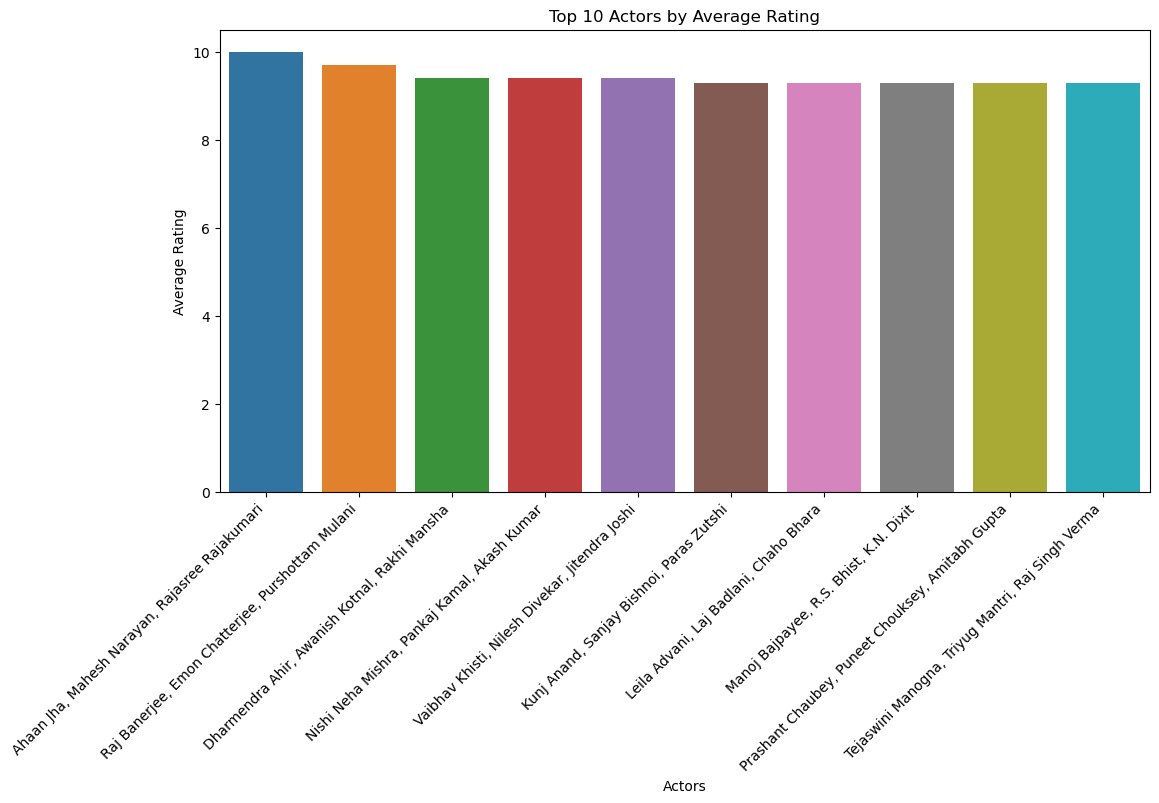

In [22]:
# 5- How many rating value for top 10 actors ?

# Calculate average rating for each actor
actor_avg_rating = df.groupby('All Actors')['Rating'].mean().reset_index()

# Select the top 10 actors based on average rating
top_10_actors = actor_avg_rating.nlargest(10, 'Rating')

# Sort the top 10 actors by rating
top_10_actors = top_10_actors.sort_values(by='Rating', ascending=False)
count=top_10_actors.value_counts()
print(count)

# Create a bar plot for the top 10 actors
plt.figure(figsize=(12, 6))
sns.barplot(x='All Actors', y='Rating', data=top_10_actors, ci=None, order=top_10_actors['All Actors'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Top 10 Actors by Average Rating')
plt.xlabel('Actors')
plt.ylabel('Average Rating')
plt.show()

Director         Rating
Arvind Pratap    9.4       1
Gautam Joshi     9.3       1
Munni Pankaj     9.4       1
Nikhil Mahar     9.3       1
Raghav Jairath   9.3       1
Rahul Mallick    9.3       1
Saif Ali Sayeed  10.0      1
Sapna Bhavnani   9.3       1
Sriram Raja      9.7       1
Suhrud Godbole   9.4       1
Name: count, dtype: int64


C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\1043607482.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Director', y='Rating', data=top_10_directors, ci=None)


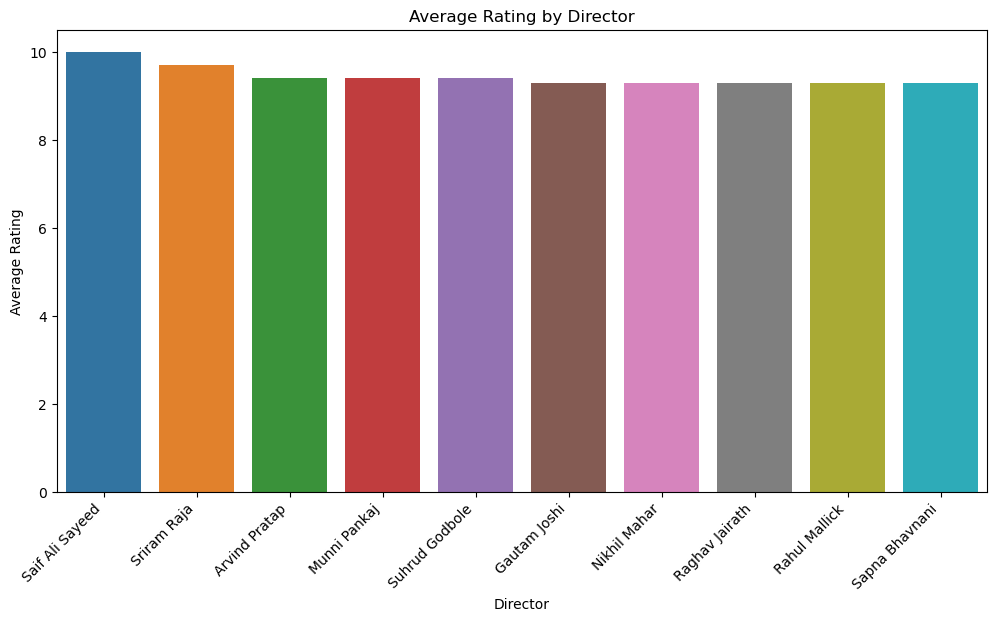

In [23]:
# 6- How many rating value for top 10 directors ?

# Calculate average rating for each director
director_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()

# Select the top 10 actors based on average rating
top_10_directors = director_avg_rating.nlargest(10, 'Rating')

# Sort the top 10 directors by average rating in descending order
top_10_directors = top_10_directors.sort_values(by='Rating', ascending=False)
count=top_10_directors.value_counts()
print(count)

# Create a bar plot for directors and their average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='Director', y='Rating', data=top_10_directors, ci=None)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Average Rating by Director')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()

In [24]:
# explore most head of data 

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,All Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
2,#Homecoming,2021,90,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,"Sayani Gupta, Plabita Borthakur, Roy Angana"
3,#Yaaram,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor"
4,...And Once Again,2010,105,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,"Rajat Kapoor, Rituparna Sengupta, Antara Mali"
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"


In [25]:
#remove All Actors column 
df.drop('All Actors',axis=1,inplace=True)

C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\2485253669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('All Actors',axis=1,inplace=True)


In [26]:
# Replace 'Rating' with your actual rating column name

grouped_cols = ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Calculate the mean of the 'Rating' column for each group
grouped_means = df.groupby(grouped_cols)['Rating'].transform('mean')

# Create a new feature for each column with the average rating for its group
for col in grouped_cols:
    new_feature_name = col + '_Avg_Rating'
    df[new_feature_name] = df.groupby(col)['Rating'].transform('mean')

C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\1339916214.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_feature_name] = df.groupby(col)['Rating'].transform('mean')
C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\1339916214.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_feature_name] = df.groupby(col)['Rating'].transform('mean')
C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_10532\1339916214.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [27]:
# explore most head of data 

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Name_Avg_Rating,Genre_Avg_Rating,Director_Avg_Rating,Actor 1_Avg_Rating,Actor 2_Avg_Rating,Actor 3_Avg_Rating
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.281141,7.000000,6.850000,7.000000,7.000000
2,#Homecoming,2021,90,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,5.841621,6.575634,5.841621,6.420811,5.970811,5.841621
3,#Yaaram,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.721320,4.400000,5.420000,4.400000,4.450000
4,...And Once Again,2010,105,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,5.841621,6.281141,6.506937,6.848324,5.755203,5.547207
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.700000,6.242222,5.313333,4.788889,5.786667,5.872727


# 

# Step 5: Machine Learning model

## Linear regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X contains your features and y contains your ratings
X = df[['Year', 'Duration','Votes','Name_Avg_Rating','Genre_Avg_Rating','Director_Avg_Rating','Actor 1_Avg_Rating','Actor 2_Avg_Rating','Actor 3_Avg_Rating']]  # Add other relevant features
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error: 0.0814707446563886
Root Mean Squared Error: 0.285430805373892
R-squared (R2): 0.9532647015696807


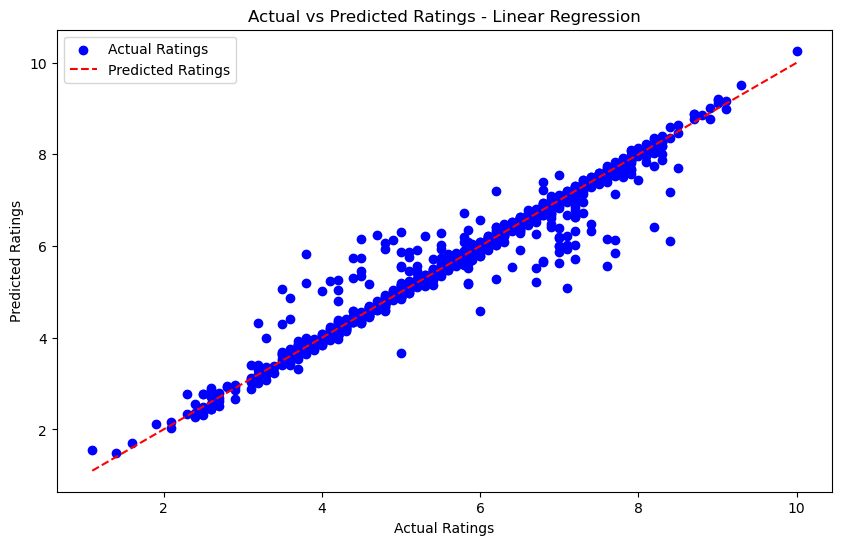

In [29]:
#Assuming you have actual ratings (y_test) and predicted ratings (y_pred)

# Plotting for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings - Linear Regression')
plt.legend()
plt.show()

In [30]:
# for linear regression

features_for_prediction = X_test

# Make predictions using the correct model and features
predicted_ratings = model.predict(features_for_prediction)

results = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': predicted_ratings})
print(results)

       Actual Ratings  Predicted Ratings
1144              4.5           5.460401
4037              3.6           3.698360
5312              6.8           6.796251
7492              7.7           7.661408
13095             5.0           5.052261
...               ...                ...
5359              3.7           3.775332
3321              4.9           4.972763
11584             4.5           5.730020
6254              5.3           5.248515
5417              6.4           6.423484

[1384 rows x 2 columns]


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the random forest regression model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared (R2): {r2_rf}')

Mean Squared Error: 0.07530848931898111
Root Mean Squared Error: 0.2744239226433824
R-squared (R2): 0.9567996495244614


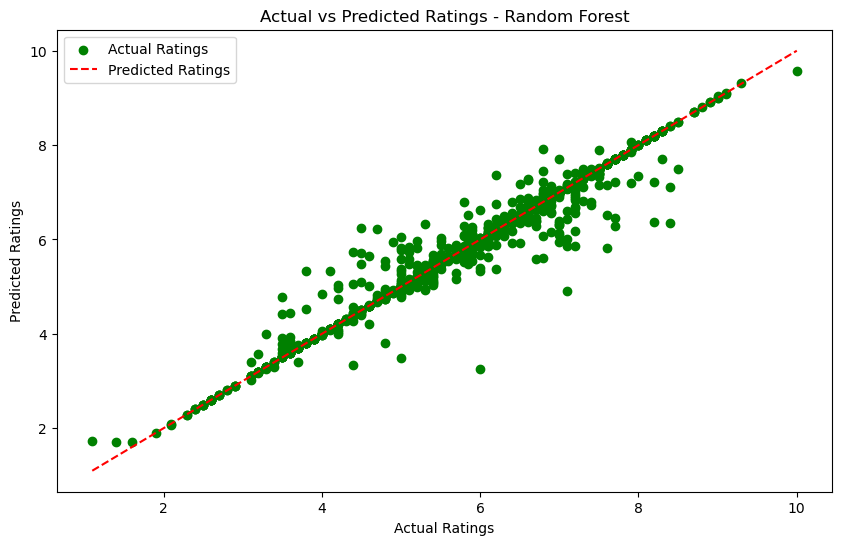

In [32]:
#Assuming you have actual ratings (y_test) and predicted ratings (y_pred)

# Plotting for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Actual Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings - Random Forest')
plt.legend()
plt.show()

In [33]:
# for random forest

features_for_prediction = X_test

# Make predictions using the correct model and features
predicted_ratings = model_rf.predict(features_for_prediction)

results = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': predicted_ratings})
print(results)

       Actual Ratings  Predicted Ratings
1144              4.5           5.714330
4037              3.6           3.600000
5312              6.8           6.761665
7492              7.7           7.700000
13095             5.0           4.998000
...               ...                ...
5359              3.7           3.748000
3321              4.9           4.911000
11584             4.5           5.489578
6254              5.3           5.300000
5417              6.4           6.398832

[1384 rows x 2 columns]


## Gradient Boosting

In [34]:
import xgboost as xgb

# Create XGBoost regression model
xg_reg = xgb.XGBRegressor()

# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xg_reg.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared (R2): {r2_xgb}')

Mean Squared Error: 0.0713199598949062
Root Mean Squared Error: 0.26705797103794937
R-squared (R2): 0.9590876501278489


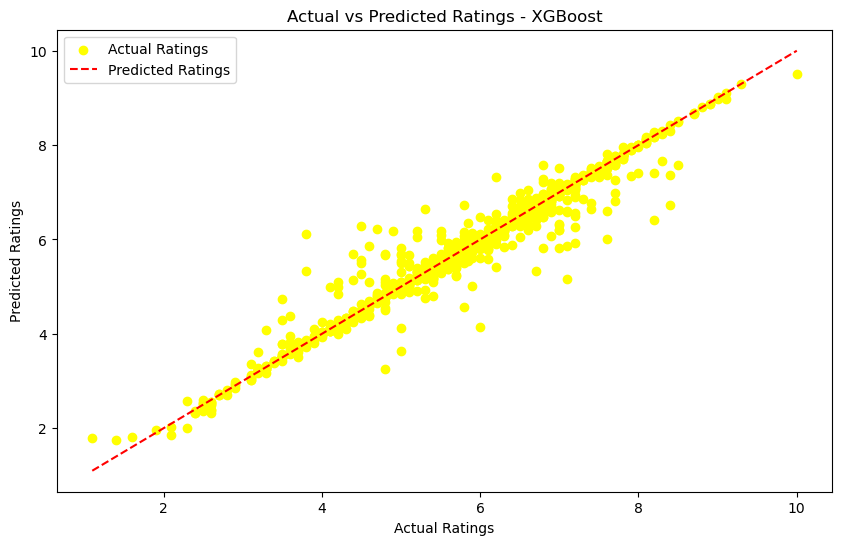

In [35]:
# Plotting for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='yellow', label='Actual Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings - XGBoost')
plt.legend()
plt.show()

In [36]:
# for Gradient Boosting

features_for_prediction = X_test

# Make predictions using the correct model and features
predicted_ratings = xg_reg.predict(features_for_prediction)

results = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': predicted_ratings})
print(results)

       Actual Ratings  Predicted Ratings
1144              4.5           5.555231
4037              3.6           3.593342
5312              6.8           6.796776
7492              7.7           7.686586
13095             5.0           4.976482
...               ...                ...
5359              3.7           3.712018
3321              4.9           4.953431
11584             4.5           5.507553
6254              5.3           5.288382
5417              6.4           6.340274

[1384 rows x 2 columns]


## Support Vector Regression (SVR)

In [37]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create SVR model with a pipeline
svr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Mean Squared Error: {mse_svr}')
print(f'Root Mean Squared Error: {rmse_svr}')
print(f'R-squared (R2): {r2_svr}')

Mean Squared Error: 0.08921856971223353
Root Mean Squared Error: 0.29869477684123225
R-squared (R2): 0.9488201992185852


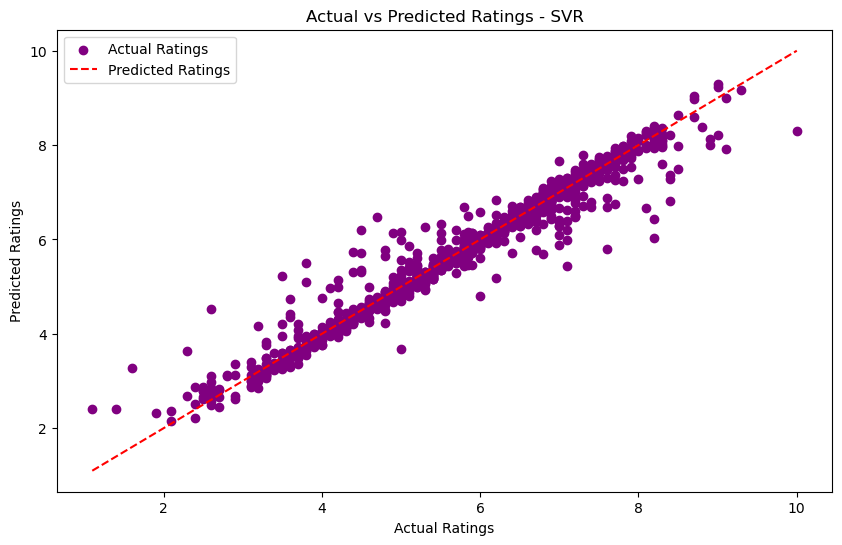

In [38]:
#Assuming you have actual ratings (y_test) and predicted ratings (y_pred)

# Plotting for SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='purple', label='Actual Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings - SVR')
plt.legend()
plt.show()

In [39]:
# for Support Vector Regression (SVR)

features_for_prediction = X_test

# Make predictions using the correct model and features
predicted_ratings = svr_model.predict(features_for_prediction)

results = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': predicted_ratings})
print(results)

       Actual Ratings  Predicted Ratings
1144              4.5           5.363978
4037              3.6           3.491845
5312              6.8           6.642851
7492              7.7           7.632755
13095             5.0           4.927186
...               ...                ...
5359              3.7           3.696224
3321              4.9           4.921802
11584             4.5           5.718044
6254              5.3           5.203790
5417              6.4           6.302813

[1384 rows x 2 columns]


## the difference between models results

In [40]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)),
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and calculate accuracies
mse = {}
rmse = {}
r2 = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse[model_name] = mean_squared_error(y_test, y_pred)
    rmse[model_name] = mean_squared_error(y_test, y_pred, squared=False)
    r2[model_name] = r2_score(y_test, y_pred)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'MSE': list(mse.values()),
    'RMSE': list(rmse.values()),
    'R-squared (R2)': list(r2.values())
})

# Display the table
print(results_df)

               Model       MSE      RMSE  R-squared (R2)
0  Linear Regression  0.081471  0.285431        0.953265
1      Random Forest  0.076261  0.276154        0.956253
2            XGBoost  0.071320  0.267058        0.959088
3                SVR  0.089219  0.298695        0.948820


In [41]:
# Create a DataFrame with actual and predicted ratings for each model
results_df = pd.DataFrame({
    'Actual rate': y_test,
    'Pred Linear': y_pred,
    'Pred Random Forest': y_pred_rf,
    'Pred XGBoost': y_pred_xgb,
    'Pred SVR': y_pred_svr,
})

# Display the DataFrame
print(results_df)

       Actual rate  Pred Linear  Pred Random Forest  Pred XGBoost  Pred SVR
1144           4.5     5.363978            5.714330      5.555231  5.363978
4037           3.6     3.491845            3.600000      3.593342  3.491845
5312           6.8     6.642851            6.761665      6.796776  6.642851
7492           7.7     7.632755            7.700000      7.686586  7.632755
13095          5.0     4.927186            4.998000      4.976482  4.927186
...            ...          ...                 ...           ...       ...
5359           3.7     3.696224            3.748000      3.712018  3.696224
3321           4.9     4.921802            4.911000      4.953431  4.921802
11584          4.5     5.718044            5.489578      5.507553  5.718044
6254           5.3     5.203790            5.300000      5.288382  5.203790
5417           6.4     6.302813            6.398832      6.340274  6.302813

[1384 rows x 5 columns]
